In [4]:
import pandas as pd
import numpy as np

In [12]:
def get_clinical_features(path='/home/NAS_mount/yslee/dataset/clinical_features_0811.csv'):
    df=pd.read_csv(path,encoding='CP949')
    df=df[['P_No','CV','PF','ST','PA','FV','CD','RR','PS','TM','BRG']]
    
    label_file=pd.read_csv('/home/NAS_mount/yslee/dataset/premolar_labels_0810.csv')
    label_file=label_file.set_index('PatientID_new')
    
    P_No_old_list=[]
    label_list=[]
    for i in range(0,len(df)):
        P_No_old_list.append(label_file['PatientID'][df['P_No'][i]])
        label_list.append(label_file['Result'][df['P_No'][i]])
    df=pd.concat([pd.DataFrame(P_No_old_list),df,pd.DataFrame(label_list)],axis=1)

    df.columns=['P_No_old','P_No','CV','PF','ST','PA','FV','CD','RR','PS','TM','BRG','Result']
    df=df.set_index('P_No')
    
    features=df[['CV','PF','ST','PA','FV','CD','RR','PS','TM','BRG']]
    label=df['Result']

    '''for i in range(0,len(features)):
        for j in range(0,len(features.iloc[i])):
            if features.iloc[i,j]=='Y':
                features.iloc[i,j]=np.float32(1)
            elif features.iloc[i,j]=='N':
                features.iloc[i,j]=np.float32(0)
            
    for i in range(0,len(label)):
        if label[i]=='FAIL' or label[i]=='Fail':
            label[i]=np.float32(1)
        elif label[i]=='SUCCESS' or label[i]=='Success':
            label[i]=np.float32(0)
        else:
            print(i,' Error!')'''
    label=label.astype(int)

    return features,label

In [13]:
clinical_df,label=get_clinical_features()
#clinical_df=clinical_df[['CV','ST','PA','CD','RR','PS','TM']] #[['CV','PF','ST','PA','FV','CD','RR','PS','TM']]

In [14]:
clinical_df

,CV,PF,ST,PA,FV,CD,RR,PS,TM,BRG
P_No,,,,,,,,,,
P-574,0.5,0,0,0.0,1,0,0,0,0,1
P-459,1.0,0,0,0.0,0,1,0,0,0,0
P-157,1.0,0,0,0.0,0,1,0,0,0,1
P-44,1.0,1,0,0.0,1,0,0,0,0,1
P-519,1.0,1,0,0.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
P-33,1.0,1,0,0.5,1,0,0,0,0,1
P-306,1.0,0,0,1.0,0,1,0,0,0,0
P-340,0.0,1,0,0.5,0,0,0,0,1,1



----------0----------
- Accuracy:  0.6060606060606061
Confusion Matirx : 
[[65 14]
 [38 15]]
- Sensitivity :  28.30188679245283
- Specificity :  82.27848101265823


----------1----------
- Accuracy:  0.6212121212121212
Confusion Matirx : 
[[68 11]
 [39 14]]
- Sensitivity :  26.41509433962264
- Specificity :  86.07594936708861


----------2----------
- Accuracy:  0.6136363636363636
Confusion Matirx : 
[[67 12]
 [39 14]]
- Sensitivity :  26.41509433962264
- Specificity :  84.81012658227847


----------3----------
- Accuracy:  0.6136363636363636
Confusion Matirx : 
[[67 12]
 [39 14]]
- Sensitivity :  26.41509433962264
- Specificity :  84.81012658227847


----------4----------
- Accuracy:  0.5833333333333334
Confusion Matirx : 
[[64 15]
 [40 13]]
- Sensitivity :  24.528301886792452
- Specificity :  81.0126582278481

Mean Accuracy :  60.757575757575765  %
Mean Sensitivity :  26.41509433962264  %


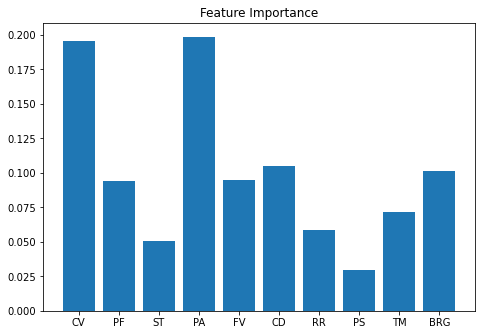

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

accuracy_list=[]
sens_list=[]
importance_list=[]

for epoch in range(0,5):   
    X_train,X_test,y_train,y_test=train_test_split(clinical_df,label,test_size=0.2,random_state=42)
    y_train=y_train.astype('int')
    y_test=y_test.astype('int')
    
    clf=RandomForestClassifier(n_estimators=50)
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    #print('- Prediction: ',pred)
    #print('- Label: ',y_test.values)
    importance_list.append(list(clf.feature_importances_))
    
    total=len(y_test)
    cnt=0
    for i in range(0,len(y_test)):
        if pred[i]==y_test[i]:
            cnt+=1
    accuracy_list.append(cnt/total)
    
    CM=confusion_matrix(y_test.values, pred,labels=[0,1])
    tn=CM[0][0]
    tp=CM[1][1]
    fp=CM[0][1]
    fn=CM[1][0]
    sens_list.append((tp/(tp+fn)))
    acc=np.sum(np.diag(CM)/np.sum(CM))
    print()
    print('----------'+str(epoch)+'----------')
    print('- Accuracy: ',acc)
    print('Confusion Matirx : ')
    print(CM)
    print('- Sensitivity : ',(tp/(tp+fn))*100)
    print('- Specificity : ',(tn/(tn+fp))*100)
    print()
    
#print(accuracy_list)
print('Mean Accuracy : ',np.mean(accuracy_list)*100,' %')
print('Mean Sensitivity : ',np.mean(sens_list)*100,' %')

avg_importance=[sum(x)/len(importance_list) for x in zip(*importance_list)]

columns=X_train.columns.values


'''
for t in X_train.columns.values:
    columns.append(t[1])
print(columns)
'''
  
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
features = columns
importance = avg_importance
ax.set_title('Feature Importance')
ax.bar(features,importance)
plt.show()

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

accuracy_list=[]
importance_list=[]

for epoch in range(0,5):   
    X_train,X_test,y_train,y_test=train_test_split(clinical_df,label,test_size=0.2,random_state=42)
    y_train=y_train.astype('int')
    y_test=y_test.astype('int')
    
    clf=SVC(gamma='auto')
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    print('- Prediction: ',pred)
    print('- Label: ',y_test.values)

    total=len(y_test)
    cnt=0
    for i in range(0,len(y_test)):
        if pred[i]==y_test[i]:
            cnt+=1
    accuracy_list.append(cnt/total)
    
print(accuracy_list)
print('Accuracy : ',np.mean(accuracy_list)*100,' %')

columns=X_train.columns.values


'''
for t in X_train.columns.values:
    columns.append(t[1])
print(columns)
'''
  
'''fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
features = columns
importance = avg_importance
ax.set_title('Feature Importance')
ax.bar(features,importance)
plt.show()'''

- Prediction:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
- Label:  [1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1]
- Prediction:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
- Label:  [1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0

"fig = plt.figure()\nax = fig.add_axes([0,0,1,1])\nfeatures = columns\nimportance = avg_importance\nax.set_title('Feature Importance')\nax.bar(features,importance)\nplt.show()"